In [99]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
import math

In [100]:
psi_z = basis(2, 0)
psi_mz = basis(2, 1)
psi_y = (basis(2, 0)+1j*basis(2, 1)).unit()
psi_my = (basis(2, 0)-1j*basis(2, 1)).unit()
psi_x = (basis(2, 0)+basis(2, 1)).unit()
psi_mx = (basis(2, 0)-basis(2, 1)).unit()

In [101]:
#Zależny od czasu Hamiltonian 
#t - czas
def hamiltonian(t, args):
    omega, omega0, omega1 = args[0], args[1], args[2]
    H = omega0*sigmaz() + omega1*(np.cos(omega*t)*sigmax()-np.sin(omega*t)*sigmay())
    H = -0.5*H
    return H

In [102]:
def dynamics(tList, psi_t0, omega, omega0, omega1):
    args    = (omega,omega0,omega1)
    delta  = omega-omega0
    T      = 2*math.pi/(math.sqrt((delta)**2 + omega1**2))
    c_ops = []
    e_ops = [sigmax(), sigmay(), sigmaz(), psi_z.proj(), psi_mz.proj()]
    output = mesolve(hamiltonian, psi_t0, tList, c_ops, e_ops, args=args, progress_bar=True)
    return {'omega': omega, 'omega0': omega0, 'omega1': omega1, \
            'sx': output.expect[0], 'sy': output.expect[1], 'sz': output.expect[2], \
            'probOfUpState': output.expect[3], 'probOfDownState': output.expect[4], 'delta': delta, 'T': T}



In [103]:
data = []
data1 = []
data2 = []
data3 = []

In [104]:
tList = np.linspace(0,10,300)
psi0=psi_z
data1=dynamics(tList, psi0, 4, 1, 1)
data2=dynamics(tList, psi0, 2, 1, 1)
data3=dynamics(tList, psi0, 1, 1, 1)
data.append(data1)
data.append(data2)
data.append(data3)

10.0%. Run time:   2.79s. Est. time left: 00:00:00:25
20.0%. Run time:   5.62s. Est. time left: 00:00:00:22
30.0%. Run time:   8.46s. Est. time left: 00:00:00:19
40.0%. Run time:  11.33s. Est. time left: 00:00:00:16
50.0%. Run time:  14.08s. Est. time left: 00:00:00:14
60.0%. Run time:  16.91s. Est. time left: 00:00:00:11
70.0%. Run time:  19.67s. Est. time left: 00:00:00:08
80.0%. Run time:  22.52s. Est. time left: 00:00:00:05
90.0%. Run time:  25.26s. Est. time left: 00:00:00:02
Total run time:  28.03s
10.0%. Run time:   2.52s. Est. time left: 00:00:00:22
20.0%. Run time:   4.94s. Est. time left: 00:00:00:19
30.0%. Run time:   7.39s. Est. time left: 00:00:00:17
40.0%. Run time:   9.86s. Est. time left: 00:00:00:14
50.0%. Run time:  12.45s. Est. time left: 00:00:00:12
60.0%. Run time:  14.87s. Est. time left: 00:00:00:09
70.0%. Run time:  17.36s. Est. time left: 00:00:00:07
80.0%. Run time:  19.78s. Est. time left: 00:00:00:04
90.0%. Run time:  22.35s. Est. time left: 00:00:00:02
Tota

In [105]:
label_1_Part1 = f"$\omega$={data1['omega']}, $\omega_0$={data1['omega0']}, $\omega_1$={data1['omega1']}"
label_1_Part2 = f"$\delta$={data1['delta']}, $T$={data1['T']:.2f}"
label_2_Part1 = f"$\omega$={data2['omega']}, $\omega_0$={data2['omega0']}, $\omega_1$={data2['omega1']}"
label_2_Part2 = f"$\delta$={data2['delta']}, $T$={data2['T']:.2f}"
label_3_Part1 = f"$\omega$={data3['omega']}, $\omega_0$={data3['omega0']}, $\omega_1$={data3['omega1']}"
label_3_Part2 = f"$\delta$={data3['delta']}, $T$={data3['T']:.2f}"

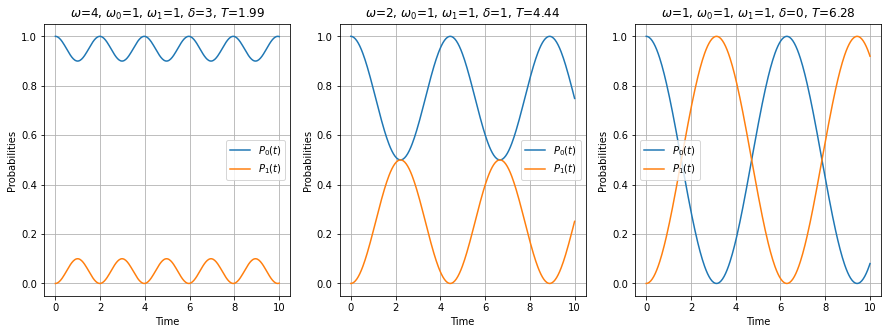

In [106]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(tList, data1['probOfUpState'], label='P_0(t)     Parameters:'+f'{label_1_Part1}, {label_1_Part2}')
axs[0].plot(tList, data1['probOfDownState'], label='P_1(t)     Parameters:'+f'{label_1_Part1}, {label_1_Part2}')
axs[0].set_xlabel('Time') 
axs[0].set_ylabel('Probabilities')
axs[0].set_title(f'{label_1_Part1}, {label_1_Part2}')
axs[0].legend(("$P_{0}(t)$", "$P_{1}(t)$"))
axs[0].grid()

axs[1].plot(tList, data2['probOfUpState'], label='P_0(t)     Parameters:'+f'{labelPart1}, {labelPart2}')
axs[1].plot(tList, data2['probOfDownState'], label='P_1(t)     Parameters:'+f'{labelPart1}, {labelPart2}')
axs[1].set_xlabel('Time') 
axs[1].set_ylabel('Probabilities')
axs[1].set_title(f'{label_2_Part1}, {label_2_Part2}')
axs[1].legend(("$P_{0}(t)$", "$P_{1}(t)$"))
axs[1].grid()

axs[2].plot(tList, data3['probOfUpState'], label='P_0(t)     Parameters:'+f'{labelPart1}, {labelPart2}')
axs[2].plot(tList, data3['probOfDownState'], label='P_1(t)     Parameters:'+f'{labelPart1}, {labelPart2}')
axs[2].set_xlabel('Time') 
axs[2].set_ylabel('Probabilities') 
axs[2].set_title(f'{label_3_Part1}, {label_3_Part2}')
axs[2].legend(("$P_{0}(t)$", "$P_{1}(t)$"))
axs[2].grid()

plt.show() 

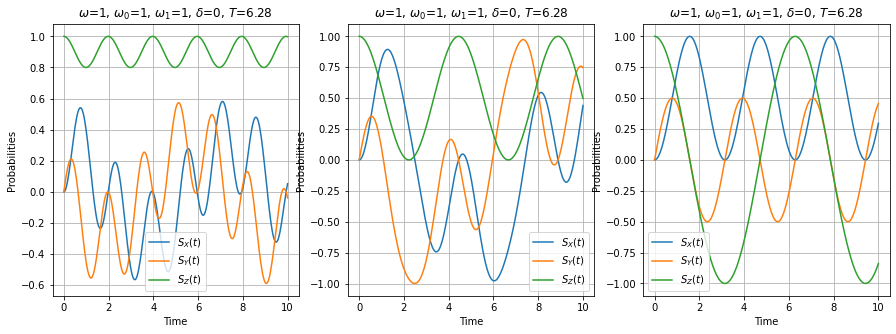

In [107]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(tList, data1['sx'])
axs[0].plot(tList, data1['sy'])
axs[0].plot(tList, data1['sz'])
axs[0].set_xlabel('Time') 
axs[0].set_ylabel('Probabilities')
axs[0].set_title(f'{label_3_Part1}, {label_3_Part2}')
axs[0].legend(("$S_{X}(t)$", "$S_{Y}(t)$", "$S_{Z}(t)$"))
axs[0].grid()

axs[1].plot(tList, data2['sx'])
axs[1].plot(tList, data2['sy'])
axs[1].plot(tList, data2['sz'])
axs[1].set_xlabel('Time') 
axs[1].set_ylabel('Probabilities')
axs[1].set_title(f'{label_3_Part1}, {label_3_Part2}')
axs[1].legend(("$S_{X}(t)$", "$S_{Y}(t)$", "$S_{Z}(t)$"))
axs[1].grid()

axs[2].plot(tList, data3['sx'])
axs[2].plot(tList, data3['sy'])
axs[2].plot(tList, data3['sz'])
axs[2].set_xlabel('Time') 
axs[2].set_ylabel('Probabilities')
axs[2].set_title(f'{label_3_Part1}, {label_3_Part2}')
axs[2].legend(("$S_{X}(t)$", "$S_{Y}(t)$", "$S_{Z}(t)$"))
axs[2].grid()

plt.show() 

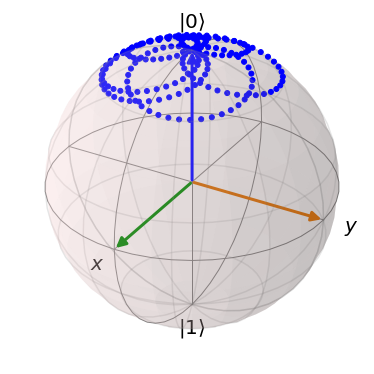

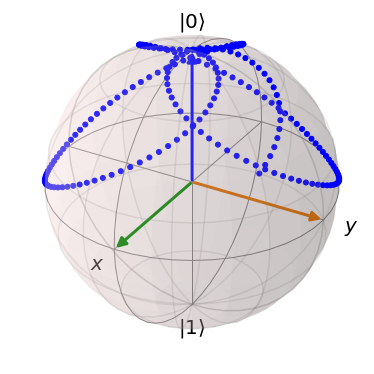

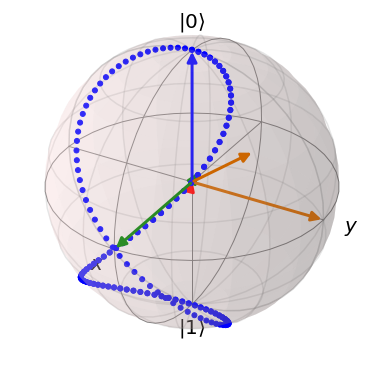

In [97]:
b1 = Bloch()
vec = [[1,0,0],[0,1,0],[0,0,1]]
pnts = [data1['sx'], data1['sy'], data1['sz']]
b1.add_points(pnts)
b1.add_vectors(vec)
b1.show()

b2 = Bloch()
vec = [[1,0,0],[0,1,0],[0,0,1]]
pnts = [data2['sx'], data2['sy'], data2['sz']]
b2.add_points(pnts)
b2.add_vectors(vec)
b2.show()

b3 = Bloch()
vec = [[1,0,0],[0,1,0],[0,0,1]]
pnts = [data3['sx'], data3['sy'], data3['sz']]
b3.add_points(pnts)
b3.add_vectors(vec)
b3.add_vectors(pnts)
b3.show()

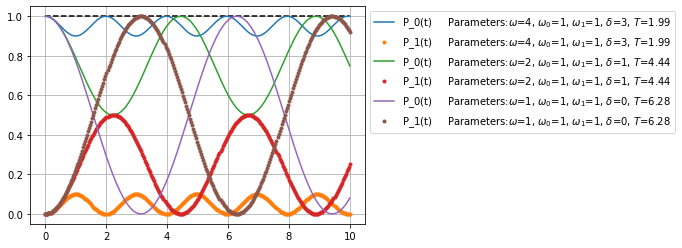

In [109]:
plt.plot(tList, [1]*300, 'k--')
for d in data:
    labelPart1 = f"$\omega$={d['omega']}, $\omega_0$={d['omega0']}, $\omega_1$={d['omega1']}"
    labelPart2 = f"$\delta$={d['delta']}, $T$={d['T']:.2f}"
    plt.plot(tList, d['probOfUpState'], label='P_0(t)     Parameters:'+f'{labelPart1}, {labelPart2}')
    plt.plot(tList, d['probOfDownState'], '.', label='P_1(t)     Parameters:'+f'{labelPart1}, {labelPart2}')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()